## Notebook to produce Figure 1 for PPP (protein preference photometry) publication

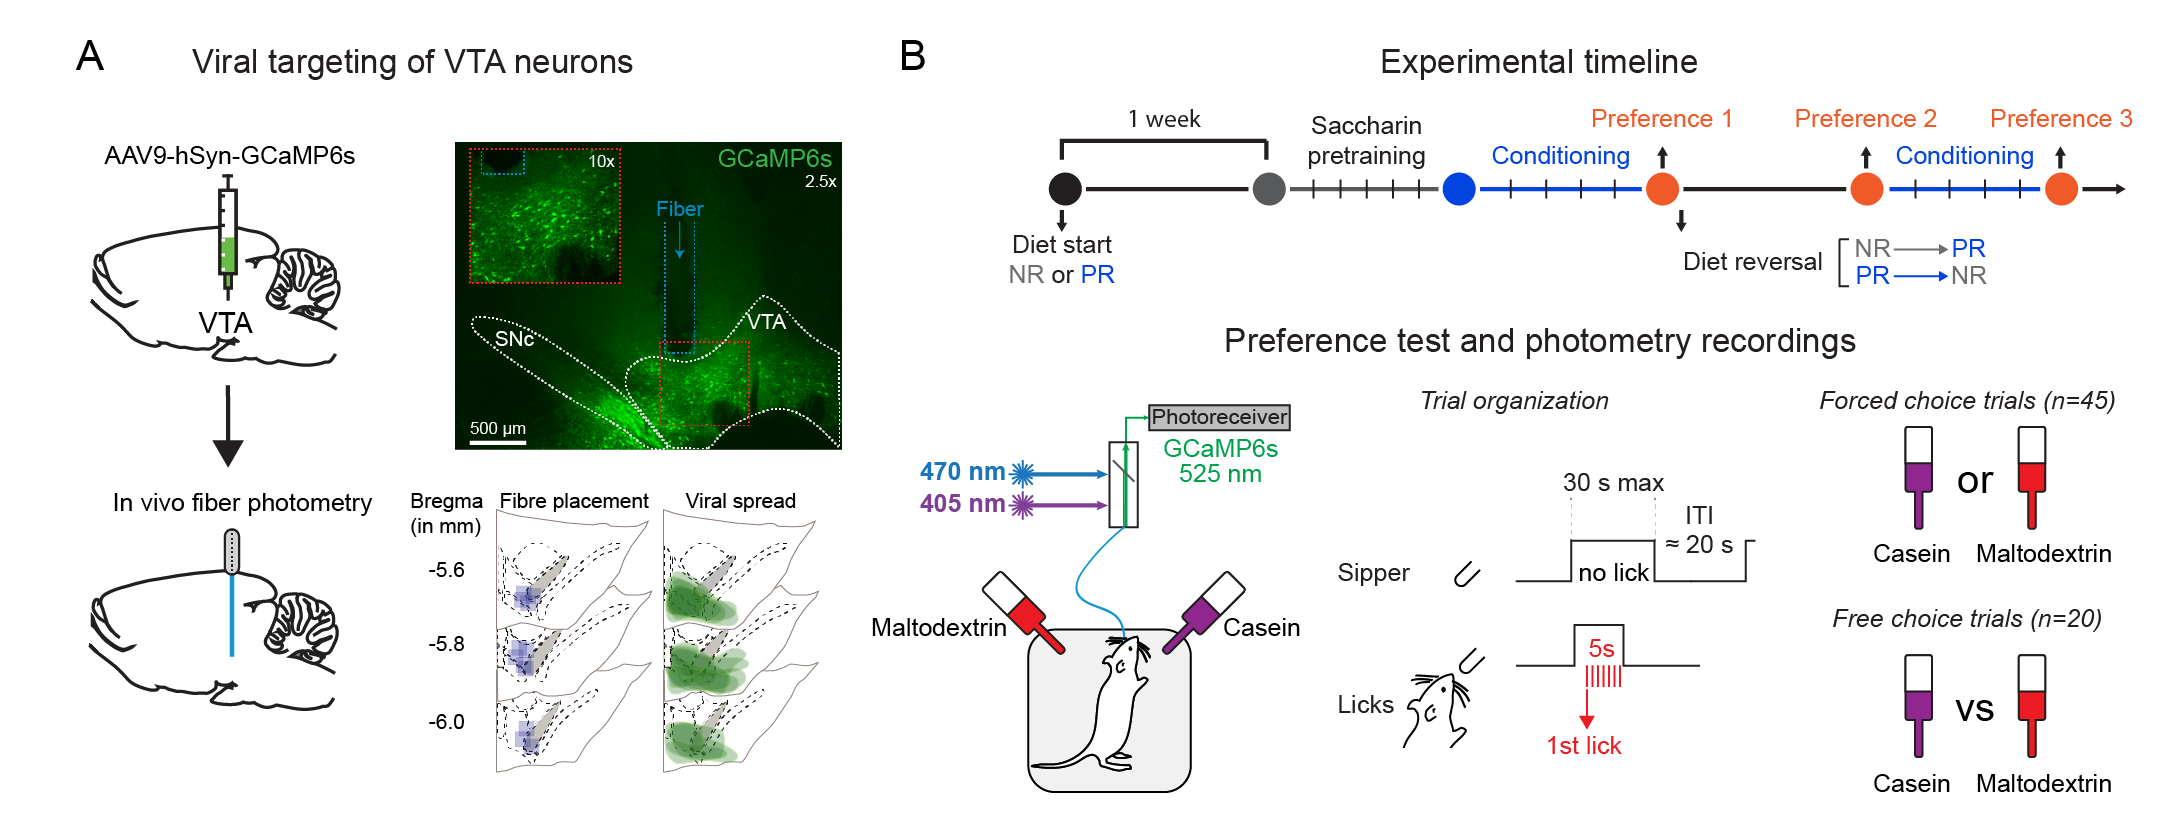

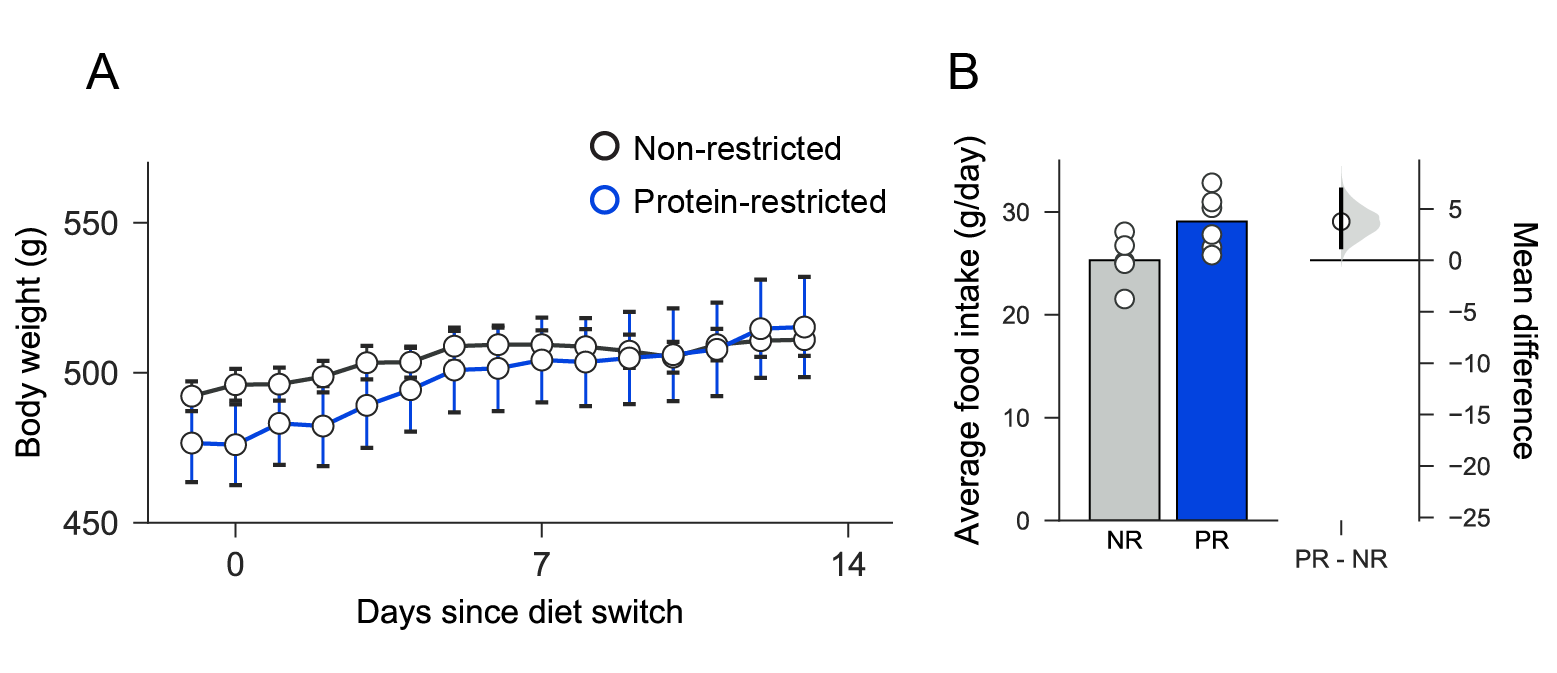

In [1]:
import sys
sys.path.append('..\\helperfx')

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.transforms as transforms

from scipy import stats

import numpy as np
import dabest as db
import pandas as pd
import trompy as tp

from settings4figs import *
from fx4figs import *

%matplotlib inline

In [2]:
xlfile = "..\\data\\PPP_body weight and food intake.xlsx"
statsfolder = "..\\stats\\"

In [3]:
# Body weight data
df = pd.read_excel(xlfile, sheet_name='PPP_bodyweight')
df.set_index('rat', inplace=True)

df.drop('cage', axis=1, inplace=True)

df.drop(['PPP1.8'], inplace=True)
df.drop(['PPP3.1'], inplace=True)
df.drop(['PPP3.6'], inplace=True)
df.drop(['PPP3.7'], inplace=True)
# df.drop(['PPP3.8'], inplace=True)
df.drop(['PPP4.2'], inplace=True)
df.drop(['PPP4.3'], inplace=True)
df.drop(['PPP4.5'], inplace=True)
df.drop(['PPP4.7'], inplace=True)
df.drop(['PPP4.8'], inplace=True)

df_days = df.loc[:,'d0':'d14']

nr_mean = df_days[df['diet'] == 'NR'].mean()
nr_sem = df_days[df['diet'] == 'NR'].std() / np.sqrt(len(df['diet'] == 'NR'))

pr_mean = df_days[df['diet'] == 'PR'].mean()
pr_sem = df_days[df['diet'] == 'PR'].std() / np.sqrt(len(df['diet'] == 'PR'))

nrd0 = df_days[df['diet'] == 'NR']['d0']
prd0 = df_days[df['diet'] == 'PR']['d0']

nrd14 = df_days[df['diet'] == 'NR']['d14']
prd14 = df_days[df['diet'] == 'PR']['d14']

In [4]:
df.set_index(['diet'], inplace=True, append=True)
df_days = df.loc[:,'d0':'d14']
data = df_days.stack()
data = data.to_frame()
data.reset_index(inplace=True) 
data.columns = ['rat', 'diet', 'day', 'bw']

data.to_csv(statsfolder+"df_days_stacked.csv")

# Food intake data
df = pd.read_excel(xlfile, sheet_name='PPP_foodintake')
df.set_index('cage', inplace=True)

df.drop(['cage_3.5'], inplace=True)
df.drop(['cage_4.4'], inplace=True)

df_days = df.loc[:,'d0':'d14'].mul(1/df['ratspercage'],axis=0)

foodintake_NR = df_days[df['diet'] == 'NR'].mean(axis=1)
foodintake_PR = df_days[df['diet'] == 'PR'].mean(axis=1)

fi = [foodintake_NR, foodintake_PR]

### Panel 1-1A - Body weight over days

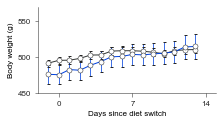

In [5]:
fig1_1A = plt.figure(figsize=(3.1,2))
fig1_1A.subplots_adjust(wspace=0.01, hspace=0.6, top=0.85, bottom=0.25, left=0.15, right=0.95)

markersize=5

# Makes bodyweight subplot
ax1 = fig1_1A.add_subplot()
nr_mean.plot(yerr=nr_sem, linewidth=1, color='xkcd:charcoal', marker='o', markersize=markersize, markerfacecolor='white', capthick=1, elinewidth=0.75, capsize=1.5)
pr_mean.plot(yerr=pr_sem, linewidth=1, color=col['pr_cas'], marker='o', markersize=markersize, markerfacecolor='white', capthick=1, elinewidth=0.75, capsize=1.5)
ax1.set_ylim([450, 570])
ax1.set_xlim([-1, 16])
ax1.set_xticks([1,8,15])
ax1.set_xticklabels(['0', '7', '14'], fontsize=8)
ax1.set_yticks([450, 500, 550])
ax1.set_yticklabels([450, 500, 550], fontsize=8)
ax1.set_ylabel('Body weight (g)', fontsize=8)
ax1.set_xlabel('Days since diet switch', fontsize=8)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

### Panel 1-1B - Food intake

C:\ProgramData\Anaconda3\envs\ppp\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Mean difference')

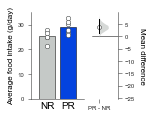

In [6]:
df1 = pd.DataFrame(fi[0])
df1.reset_index(inplace=True)
df1.columns = ["cage", "NR"]

df2 = pd.DataFrame(fi[1])
df2.reset_index(inplace=True)
df2.columns = ["cage", "PR"]

df_new = pd.concat([df1, df2], sort=True)

gs = gridspec.GridSpec(1, 2, width_ratios=[2,1], wspace=0.2)
fig1_1B = plt.figure(figsize=(2,2))
fig1_1B.subplots_adjust(wspace=0.00, hspace=0.6, top=0.85, bottom=0.25, left=0.2, right=0.8)
    
ax2 = fig1_1B.add_subplot(gs[0,0])
_, barx, _, _ = tp.barscatter(fi, barfacecoloroption='individual',
                  barwidth = 0.8,
                  barfacecolor = [col['nr_cas'], col['pr_cas']],
                  scatteredgecolor = ['xkcd:charcoal'],
                  scattersize = 20,
                  ax=ax2)
ax2.set_yticks([0, 10, 20, 30])
ax2.set_xlim([0.25,2.75])
ax2.set_ylim([0, 35])
ax2.set_ylabel("Average food intake (g/day)", fontsize=8)

grouplabel=['NR', 'PR']

for x, label in zip(barx, grouplabel):
    ax2.text(x, -1, label, ha="center", va="top")
    
ax3 = fig1_1B.add_subplot(gs[0,1])
    
est_data = db.load(data=df_new, idx=("NR", "PR"))

e = est_data.mean_diff
results = e.results

contrast_xtick_labels = []

dabest_obj  = e.dabest_obj
plot_data   = e._plot_data
xvar        = e.xvar
yvar        = e.yvar
is_paired   = e.is_paired


all_plot_groups = dabest_obj._all_plot_groups
idx             = dabest_obj.idx

default_violinplot_kwargs = {'widths':0.5, 'vert':True,
                           'showextrema':False, 'showmedians':False}
    
violinplot_kwargs = default_violinplot_kwargs

ticks_to_skip   = np.cumsum([len(t) for t in idx])[:-1].tolist()
ticks_to_skip.insert(0, 0)

# Then obtain the ticks where we have to plot the effect sizes.
ticks_to_plot = [t for t in range(0, len(all_plot_groups))
                if t not in ticks_to_skip]

ticks_to_plot = [barx[tick] for tick in ticks_to_plot]

fcolors = [col['nr_cas'], col['pr_cas']]

for j, tick in enumerate(ticks_to_plot):
    current_group     = results.test[j]
    current_control   = results.control[j]
    current_bootstrap = results.bootstraps[j]
    current_effsize   = results.difference[j]
    current_ci_low    = results.bca_low[j]
    current_ci_high   = results.bca_high[j]
    
#     # Create the violinplot.
    v = ax3.violinplot(current_bootstrap[~np.isinf(current_bootstrap)],
                                  positions=[tick],
                                  **violinplot_kwargs)



    halfviolin_alpha=0.7
    halfviolin(v, fill_color=fcolors[j], alpha=halfviolin_alpha)

    ytick_color="black"
    es_marker_size=4

#     # Plot the effect size.
    ax3.plot([tick], current_effsize, marker='o',
                        color=ytick_color,
                        markersize=es_marker_size)
    # Plot the confidence interval.
    ax3.plot([tick, tick],
                        [current_ci_low, current_ci_high],
                        linestyle="-",
                        color=ytick_color,
                        # linewidth=group_summary_kwargs['lw'],
                        linewidth=1)
    
ax3.spines["bottom"].set_visible(False)
ax3.spines["right"].set_visible(True)
ax3.spines["left"].set_visible(False)

ax3.yaxis.set_ticks_position("right")
ax3.yaxis.set_label_position("right")

# ax1.set_ylim([16, 34])
lims = ax2.get_ylim()
nr_mean = np.mean(fi[0])
lims2 = lims-nr_mean
ax3.set_ylim(lims2)

ax3.axhline(0, color='k', zorder=-20)

ax3.set_xticks([2])
ax3.set_xticklabels(["PR - NR"])
ax3.set_xlim([1.8, 2.5])

ax3.set_ylabel("Mean difference", rotation=270, fontsize=8, va="bottom")


### Panel 1-2 - Intake during conditioning sessions

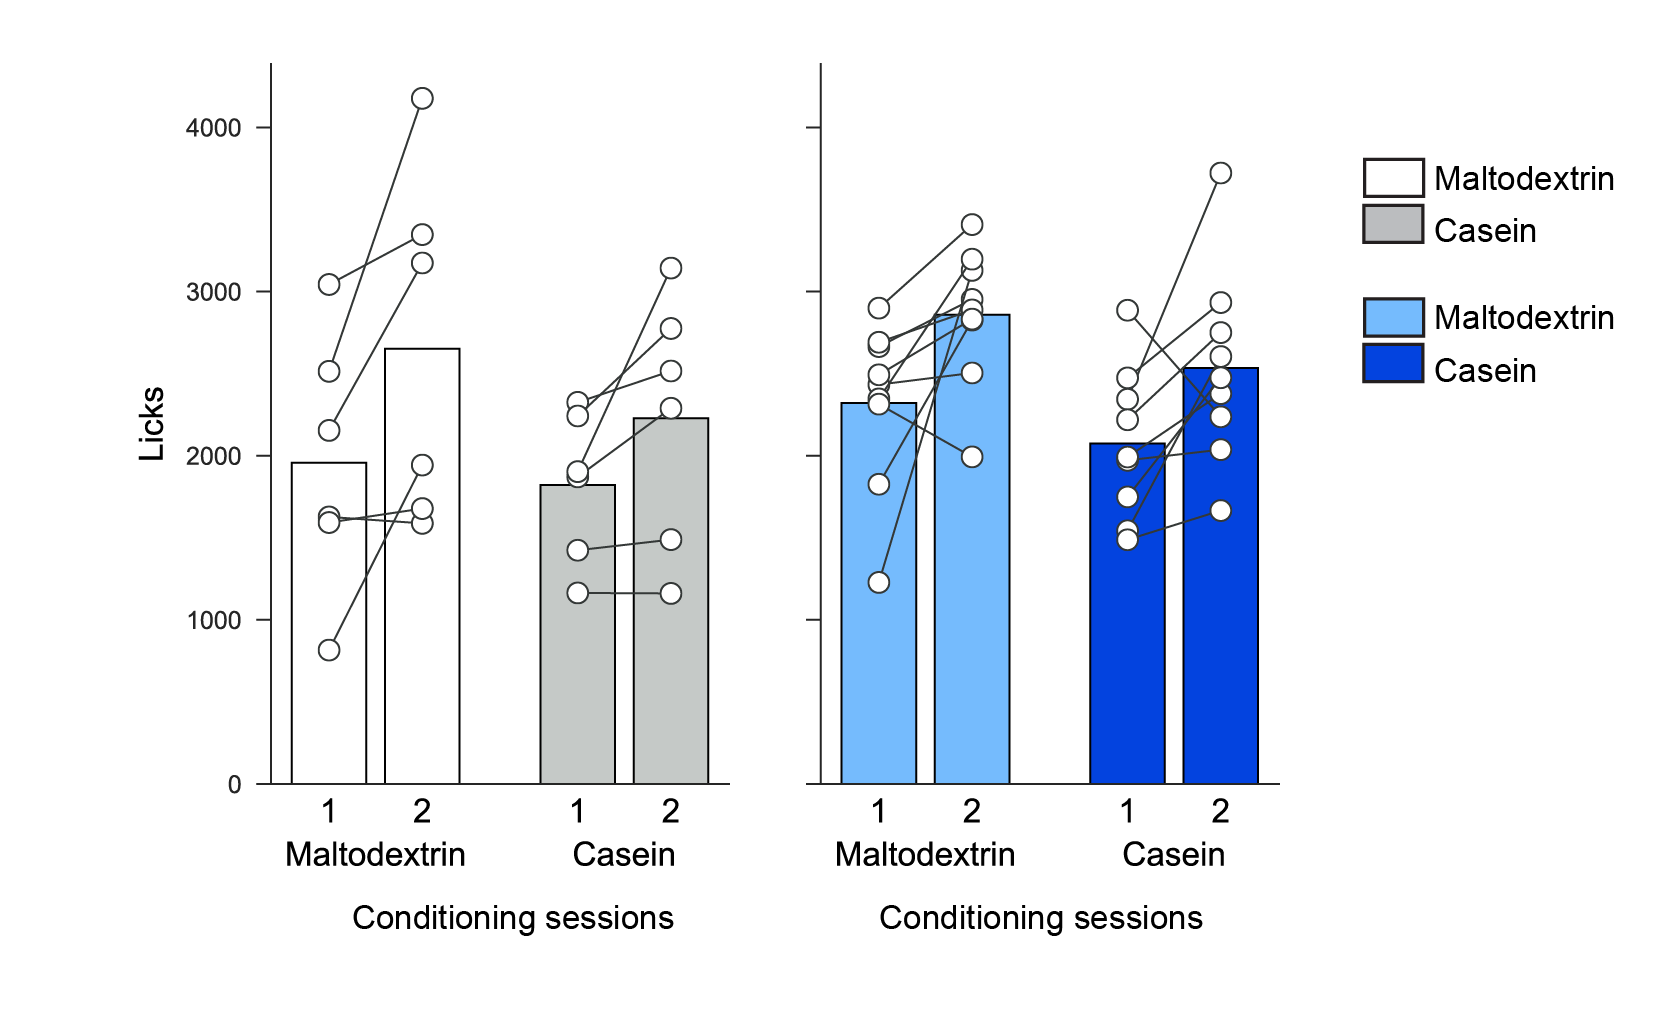

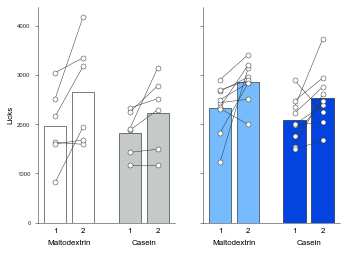

In [7]:
cas_sessions = ['cond1-cas1', 'cond1-cas2']
malt_sessions = ['cond1-malt1', 'cond1-malt2']  

figcond, ax = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={
    "left": 0.2, "bottom": 0.2})
df = df_cond
dietmsk = df['diet'] == 'NR'
cols = [col["nr_malt"]]*2 + [col["nr_cas"]]*2
barx = condfigs(df, malt_sessions+cas_sessions, dietmsk, cols, ax[0])

dietmsk = df['diet'] == 'PR'
cols = [col["pr_malt"]]*2 + [col["pr_cas"]]*2
barx = condfigs(df, malt_sessions+cas_sessions, dietmsk, cols, ax[1])

ax[0].set_ylabel('Licks', fontsize=8)
ax[0].set_yticks([0, 1000, 2000, 3000, 4000])

yrange = ax[0].get_ylim()[1] - ax[0].get_ylim()[0]
grouplabel=['Maltodextrin', 'Casein', ]
barlabels=['1','2','1','2']
barlabeloffset=ax[0].get_ylim()[0] - yrange*0.02
grouplabeloffset=ax[0].get_ylim()[0] - yrange*0.08
for ax in ax:
    for x, label in zip(barx, barlabels):
        ax.text(x, barlabeloffset, label, va='top', ha='center', fontsize=8)
    for x, label in zip([1,2], grouplabel):
        ax.text(x, grouplabeloffset, label, va='top', ha='center', fontsize=8)